In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import shutil

In [9]:
original_dataset_dir = 'D:\Datasets\kaggle_cat_vs_dog'
cat_org_dataset_dir = os.path.join(original_dataset_dir, 'Cat')
dog_org_dataset_dir = os.path.join(original_dataset_dir, 'Dog')

In [10]:
base_dir = 'D:\Datasets\cats_and_dogs_small'

In [11]:
os.mkdir(base_dir)

In [12]:
train_dir = os.path.join(base_dir, 'train')

In [13]:
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [14]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)

In [15]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [16]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]

In [17]:
for fname in fnames:
    src = os.path.join(cat_org_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(cat_org_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [19]:
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(cat_org_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(dog_org_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(dog_org_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(dog_org_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500


In [22]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [23]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [24]:
model = models.Sequential()

In [25]:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [36]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


In [39]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [40]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [41]:
validation_generator = valid_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [51]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=20,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/20
 15/100 [===>..........................] - ETA: 1:50 - loss: 0.6655 - acc: 0.6033

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping 

 99/100 [============================>.] - ETA: 1s - loss: 0.6629 - acc: 0.5899

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping 

100/100 [==============================] - 171s 2s/step - loss: 0.6631 - acc: 0.5900 - val_loss: 0.7153 - val_acc: 0.5120
Epoch 2/20
100/100 [==============================] - 175s 2s/step - loss: 0.6609 - acc: 0.6065 - val_loss: 0.6542 - val_acc: 0.6110
Epoch 3/20
100/100 [==============================] - 175s 2s/step - loss: 0.6148 - acc: 0.6645 - val_loss: 0.6592 - val_acc: 0.5780
Epoch 4/20
100/100 [==============================] - 175s 2s/step - loss: 0.5675 - acc: 0.7000 - val_loss: 0.6008 - val_acc: 0.6790
Epoch 5/20
100/100 [==============================] - 175s 2s/step - loss: 0.5203 - acc: 0.7410 - val_loss: 0.5953 - val_acc: 0.6830
Epoch 6/20
100/100 [==============================] - 174s 2s/step - loss: 0.5023 - acc: 0.7495 - val_loss: 0.5893 - val_acc: 0.7000
Epoch 7/20
100/100 [==============================] - 177s 2s/step - loss: 0.4602 - acc: 0.7755 - val_loss: 0.6559 - val_acc: 0.6750
Epoch 8/20
100/100 [==============================] - 177s 2s/step - loss: 0.414

In [52]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [54]:
epochs = range(1, len(acc) + 1)

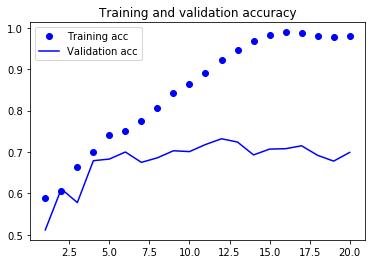

In [55]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

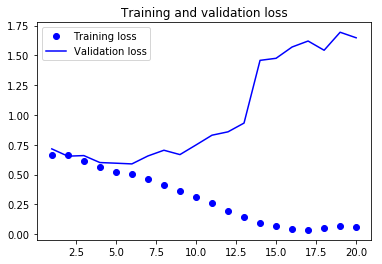

In [56]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()